In [11]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
empresas = ['claroecua', 'movistarecu', 'marathonsportsec', 'cntecuador',
            'chevroletecuador', 'cocacolaec', 'directvla', 'latamecuador',
            'quicentroshopping', 'sanmarinogye', 'galletasamorecuador', 'nescafe.ec',
            'almacenesdeprati', 'tiaec', 'bancoguayaquil', 'bancopacificoec',
            'bancobolivariano', 'kfcecuador', 'mcdonaldsecuador', 'bancopichinchaecuador',
            'NissanEcuador', 'pronacatqma', 'aviancaenecuador', 'cinemarkecuador',
            'supercines', 'pilsenerec', 'clubpremiumec', 'grupotvcableec',
            'netlife.ecuador', 'pepsiecuador', 'yanbal.ec', 'huaweimobileec', 
            'univisate', 'papajohnsecuador', 'JuanValdezCafeEcuador', 'DominosPizzaEcuador',
            'ElCafedeTere', 'sweetandcoffee']

tipo_empresas = ['teleco', 'teleco', 'clothing', 'teleco',
                  'auto', 'food&beb', 'teleco', 'airline',
                  'cc', 'cc', 'food&beb', 'food&beb',
                  'clothing', 'retail', 'bco', 'bco',
                  'bco', 'restaurant', 'restaurant', 'bco',
                  'auto', 'food&beb', 'airline', 'cine',
                  'cine', 'food&beb', 'food&beb', 'teleco',
                  'teleco', 'food&beb', 'makeup', 'teleco',
                  'teleco', 'restaurant', 'restaurant', 'restaurant',
                  'restaurant']

data_empresas={}
comments_empresas={}
for empresa in empresas:
    data_empresas[empresa] = pd.read_csv("C:/Users/pablo/Google Drive/ESPOL/Concurso Supercias/fb_data_v2/Dataset/data_{}.csv".format(empresa))
    comments_empresas[empresa] = pd.read_csv("C:/Users/pablo/Google Drive/ESPOL/Concurso Supercias/fb_data_v2/Dataset/comments_{}.csv".format(empresa), sep="||")

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


ValueError: split() requires a non-empty pattern match.

In [78]:
dict_tipo_empresas = {}
for tipo in tipo_empresas:
    if tipo not in dict_tipo_empresas:
        dict_tipo_empresas[tipo] = 1
    else:
        dict_tipo_empresas[tipo] += 1
dict_tipo_empresas

{'airline': 2,
 'auto': 2,
 'bco': 4,
 'cc': 2,
 'cine': 2,
 'clothing': 2,
 'food&beb': 7,
 'makeup': 1,
 'restaurant': 6,
 'retail': 1,
 'teleco': 8}

In [15]:
engage_empresa = pd.DataFrame(columns=['likes', 'comments', 'shares'])
for empresa in data_empresas:
    serie_mean = data_empresas[empresa].mean(axis=0)
    serie_trans = serie_mean.to_frame().unstack().unstack()
    serie_trans.drop('Post_id', axis=1, inplace=True)
    serie_trans['empresa'] = empresa
    serie_trans.set_index(keys='empresa', inplace=True)
    engage_empresa = pd.concat([engage_empresa, serie_trans])
engage_empresa

,likes,comments,shares
claroecua,888.804308,23.819692,56.905846
movistarecu,5068.075862,83.353103,342.794483
marathonsportsec,1040.831400,41.613400,95.471600
cntecuador,350.019420,18.211434,17.699105
chevroletecuador,6600.000941,173.022118,248.604235
cocacolaec,4069.601020,41.733673,142.444898
directvla,146.993208,15.398491,22.938868
latamecuador,511.885921,24.801336,61.308848
quicentroshopping,84.840000,2.673846,4.910769
sanmarinogye,63.861563,4.813397,5.944498


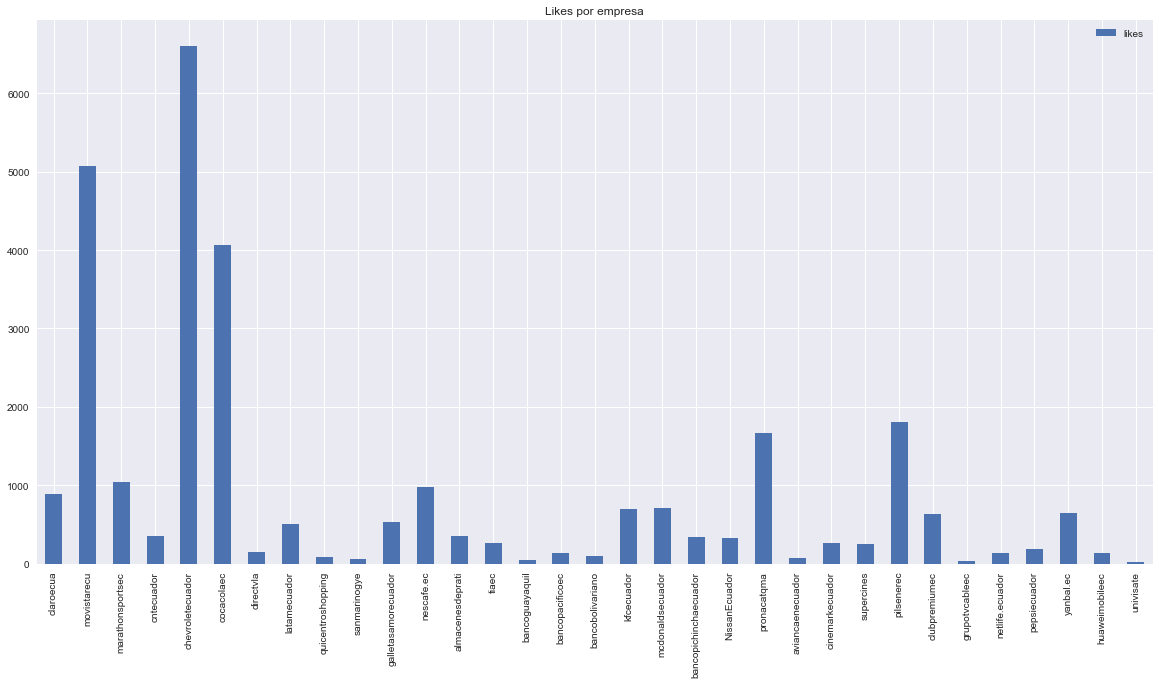

In [60]:
engage_empresa['likes'].plot(figsize=(20,10), kind='bar', title='Likes por empresa', legend=True) #,logy=True)
plt.show()

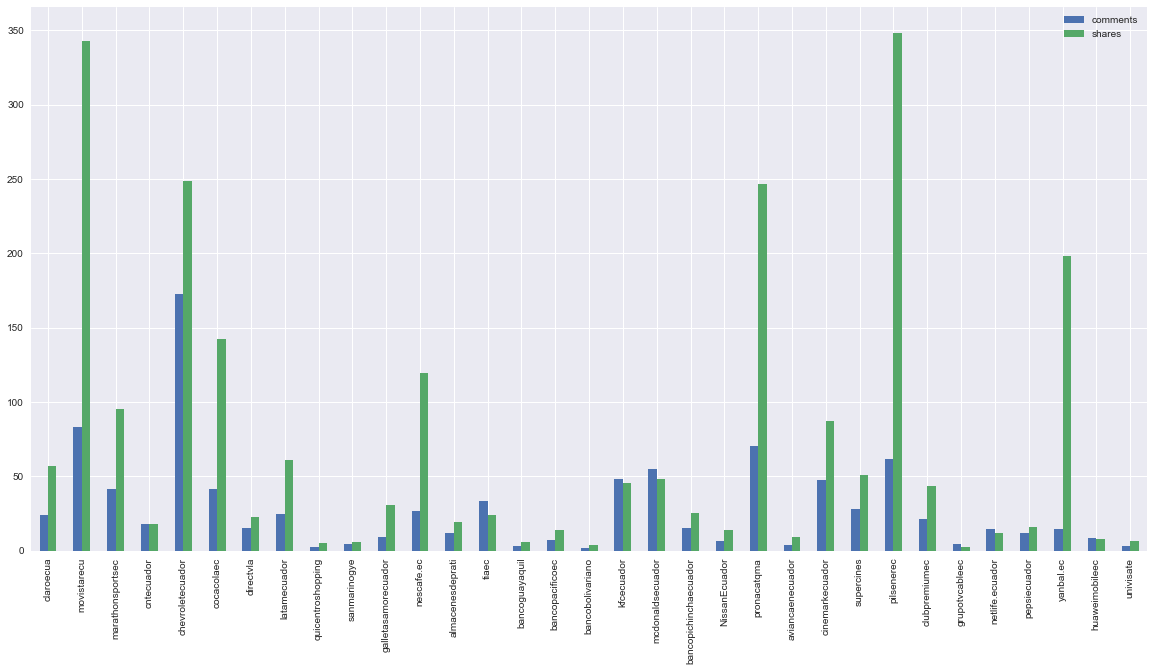

In [61]:
engage_empresa[['comments', 'shares']].plot(figsize=(20,10), kind='bar') #,logy=True)
plt.show()

In [73]:
finance = pd.read_csv('empresa_finance.csv')
finance.drop(['Expediente', 'CIIU', 'Fecha constitucion'], axis=1, inplace=True)
finance.set_index(keys='Nombre', inplace=True)
finance.tail()

,Activo,Patrimonio,Ingresos Ventas,Utilidad,Efectivo,Gastos Publicidad,Liquidez,Ratio Marketing,Margen neto,Activo patrim,ASSEF,Cant Empleados
Nombre,,,,,,,,,,,,
grupotvcableec,126158657.0,14586246.70,101668053.3,10187891.40,2712083.57,1627637.47,0.021497,0.012902,0.100207,0.115618,0.805875,1591.0
netlife.ecuador,30190124.6,11684079.50,53866883.8,3793726.54,773924.15,7140.90,0.025635,0.000237,0.070428,0.387017,1.784255,468.0
pepsiecuador,57191943.4,32671964.40,49939331.9,-160417.38,1325576.19,4279159.67,0.023178,0.074821,-0.003212,0.571269,0.873188,532.0
yanbal.ec,78722389.5,3807144.91,161628880.2,5533609.98,21773103.70,7186953.62,0.276581,0.091295,0.034237,0.048362,2.053150,535.0
huaweimobileec,101444245.0,8371915.00,101870351.7,-2634708.00,33773117.00,3000091.44,0.332923,0.029574,-0.025863,0.082527,1.004200,271.0


In [76]:
data_fb = engage_empresa.join(finance)
corr = data_fb.corr('spearman')
corr = corr.iloc[0:3]
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,likes,comments,shares,Activo,Patrimonio,Ingresos Ventas,Utilidad,Efectivo,Gastos Publicidad,Liquidez,Ratio Marketing,Margen neto,Activo patrim,ASSEF,Cant Empleados
likes,1,0.84,0.91,0.24,0.31,0.46,0.32,0.1,0.4,-0.066,0.23,-0.071,0.3,0.14,0.36
comments,0.84,1,0.9,0.023,0.16,0.29,0.16,-0.08,0.22,-0.072,0.21,-0.2,0.37,0.26,0.33
shares,0.91,0.9,1,0.087,0.14,0.32,0.22,-0.016,0.31,-0.058,0.25,-0.15,0.21,0.2,0.23
